In [24]:
# Load dataset
file_path = '../data/dataset_laba_rugi_10th.csv'
df = pd.read_csv(file_path)

In [25]:
# Tampilkan 5 baris pertama dan informasi umum dataset
df_head = df.head()
df_info = df.info()

df_head, df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User_ID            60000 non-null  int64 
 1   Bidang_Usaha       60000 non-null  object
 2   Tahun              60000 non-null  int64 
 3   Bulan              60000 non-null  int64 
 4   Pendapatan         60000 non-null  int64 
 5   Beban_Operasional  60000 non-null  int64 
 6   Pajak              60000 non-null  int64 
 7   Laba_Rugi          60000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 3.7+ MB


(   User_ID Bidang_Usaha  Tahun  Bulan  Pendapatan  Beban_Operasional  \
 0        1  Perdagangan   2015      1   249900595          270975502   
 1        1  Perdagangan   2015      2   465968276          153224038   
 2        1  Perdagangan   2015      3   183120466          269467210   
 3        1  Perdagangan   2015      4   409525748           96737383   
 4        1  Perdagangan   2015      5   161190146          108409749   
 
       Pajak  Laba_Rugi  
 0  26081788  -47156695  
 1  40788921  271955317  
 2  31301898 -117648642  
 3  26249687  286538678  
 4  45959284    6821113  ,
 None)

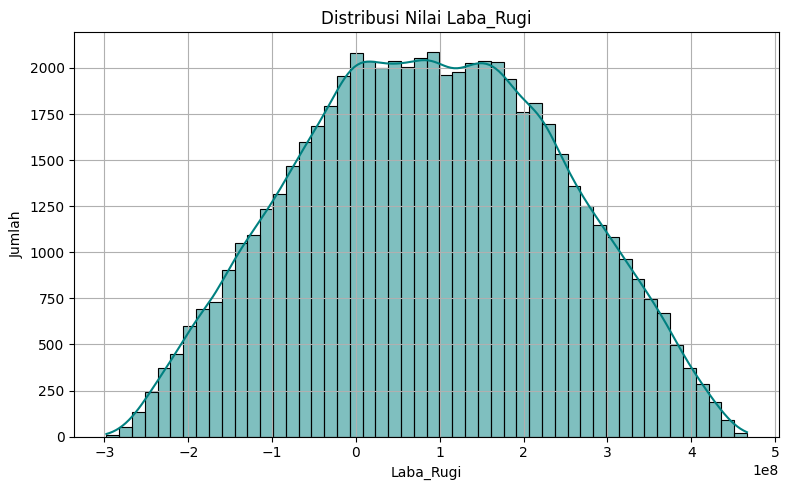

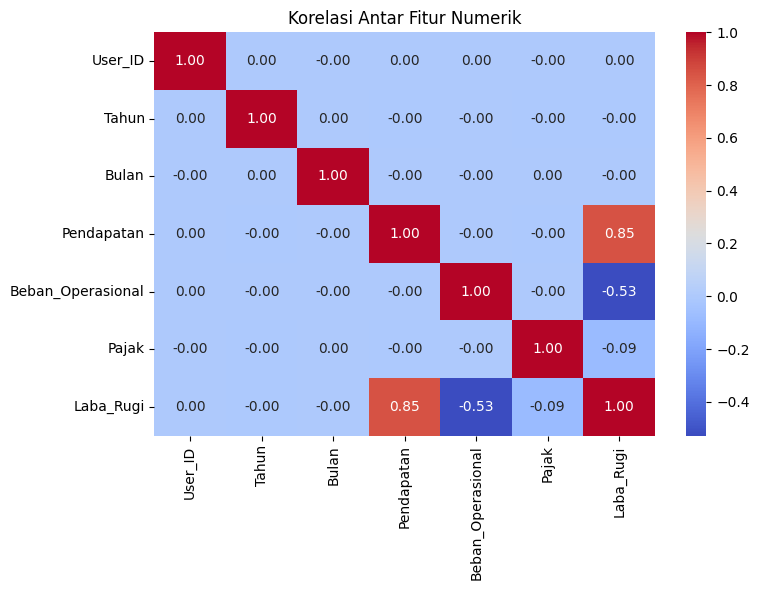

C:\Users\donid\AppData\Local\Temp\ipykernel_16228\2937381683.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Bidang_Usaha', order=df['Bidang_Usaha'].value_counts().index, palette='Set2')


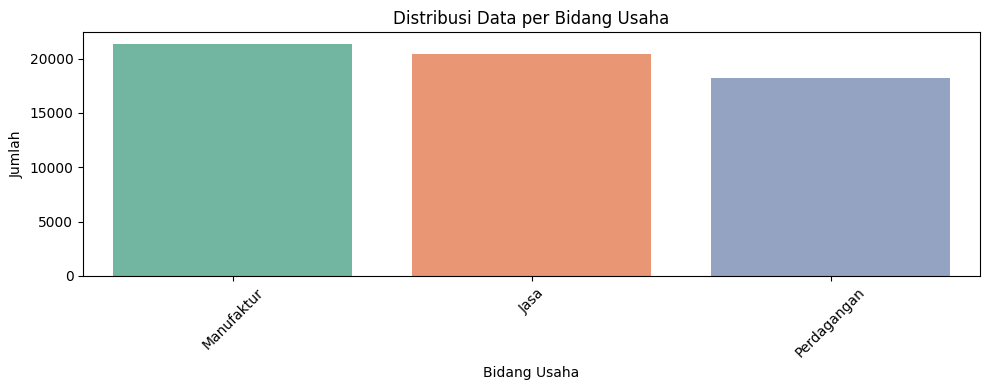

(User_ID              0
 Bidang_Usaha         0
 Tahun                0
 Bulan                0
 Pendapatan           0
 Beban_Operasional    0
 Pajak                0
 Laba_Rugi            0
 dtype: int64,
 np.int64(0),
             User_ID         Tahun         Bulan    Pendapatan  \
 count  60000.000000  60000.000000  60000.000000  6.000000e+04   
 mean     250.500000   2019.500000      6.500000  2.754895e+08   
 std      144.338481      2.872305      3.452081  1.296603e+08   
 min        1.000000   2015.000000      1.000000  5.000102e+07   
 25%      125.750000   2017.000000      3.750000  1.632454e+08   
 50%      250.500000   2019.500000      6.500000  2.765697e+08   
 75%      375.250000   2022.000000      9.250000  3.872794e+08   
 max      500.000000   2024.000000     12.000000  4.999671e+08   
 
        Beban_Operasional         Pajak     Laba_Rugi  
 count       6.000000e+04  6.000000e+04  6.000000e+04  
 mean        1.601583e+08  2.757456e+07  8.775658e+07  
 std         8.

In [26]:
# 1. Cek missing values dan duplikasi
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

# 2. Statistik deskriptif
descriptive_stats = df.describe()

# 3. Distribusi Laba_Rugi
plt.figure(figsize=(8, 5))
sns.histplot(df['Laba_Rugi'], bins=50, kde=True, color='teal')
plt.title("Distribusi Nilai Laba_Rugi")
plt.xlabel("Laba_Rugi")
plt.ylabel("Jumlah")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()

# 5. Distribusi bidang usaha
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Bidang_Usaha', order=df['Bidang_Usaha'].value_counts().index, palette='Set2')
plt.title("Distribusi Data per Bidang Usaha")
plt.xlabel("Bidang Usaha")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

missing_values, duplicate_rows, descriptive_stats

In [27]:
# Simpan hasil analisis ke dalam file CSV
output_path = 'data/analisis_dataset.csv'

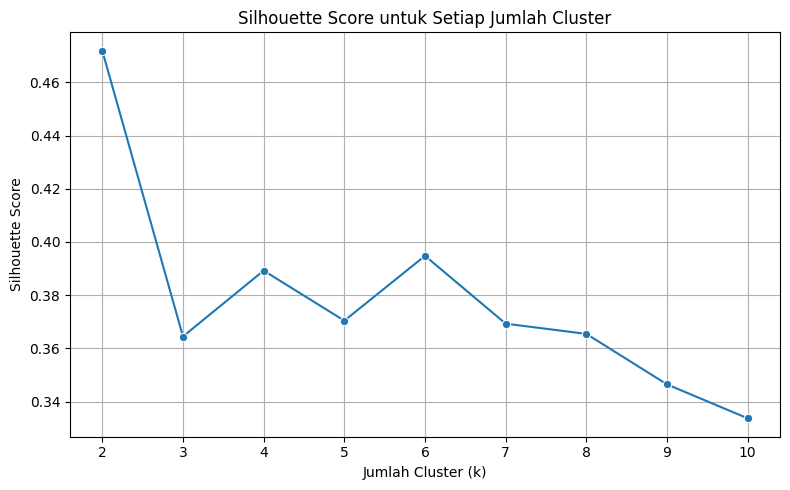

2

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Pilih fitur untuk clustering
features = ['Bidang_Usaha', 'Pendapatan', 'Beban_Operasional', 'Pajak', 'Laba_Rugi']
X = df[features]

# 2. One-Hot Encoding untuk 'Bidang_Usaha'
categorical_features = ['Bidang_Usaha']
numeric_features = ['Pendapatan', 'Beban_Operasional', 'Pajak', 'Laba_Rugi']

# Gunakan pipeline preprocessing untuk menyatukan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # sisanya (numerik) langsung dilewatkan
)

# 3. Siapkan data yang sudah dipreprocessing untuk clustering
X_processed = preprocessor.fit_transform(X)

# 4. Coba beberapa jumlah cluster dan hitung silhouette score
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(score)

# Visualisasi hasil silhouette score
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(cluster_range), y=silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Setiap Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cari jumlah cluster terbaik (nilai silhouette tertinggi)
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
best_k


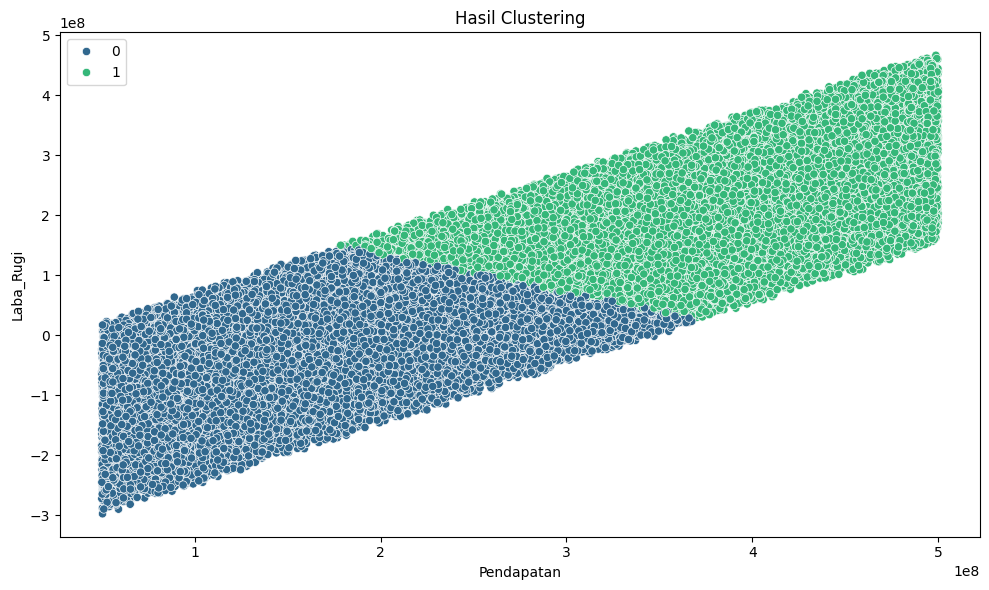

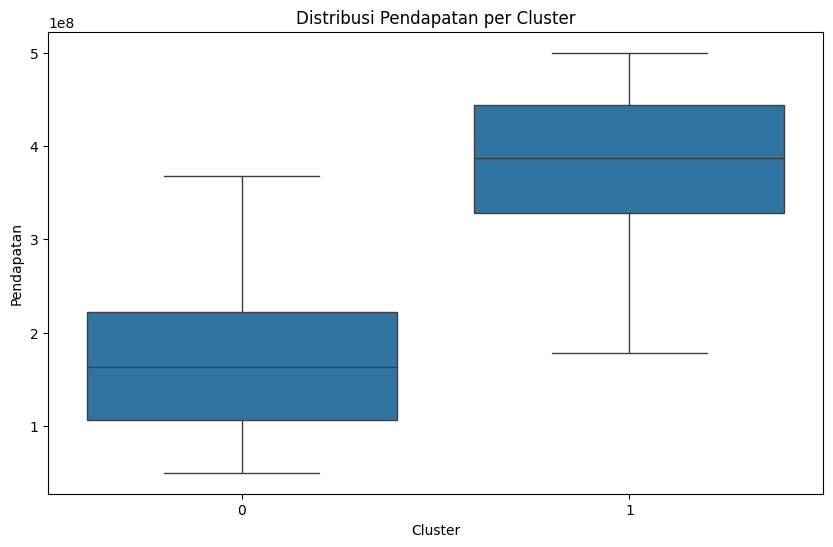

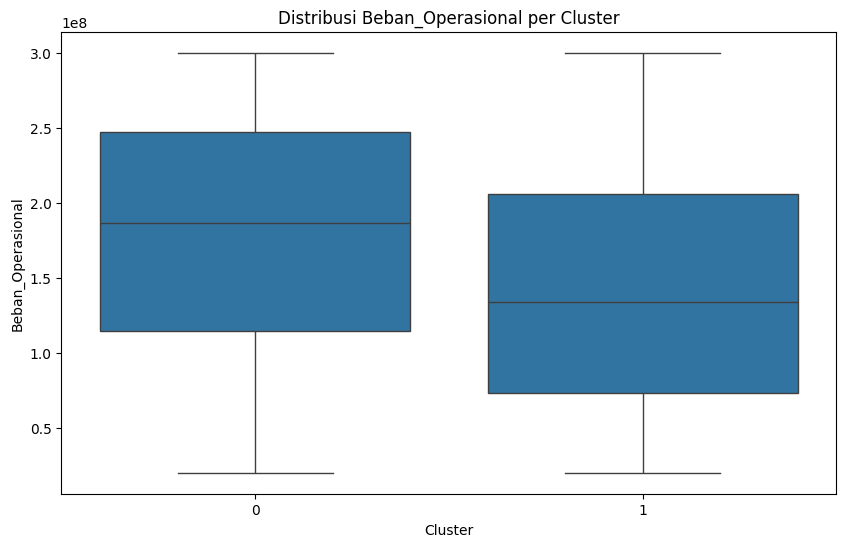

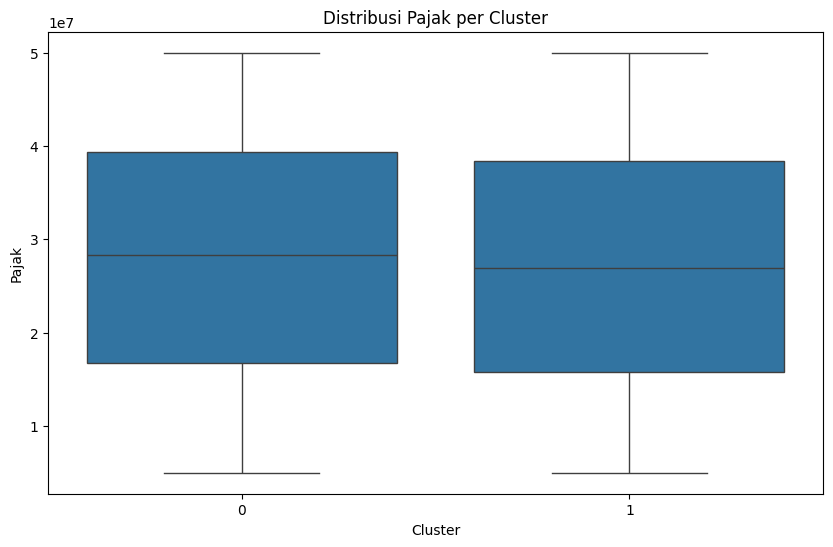

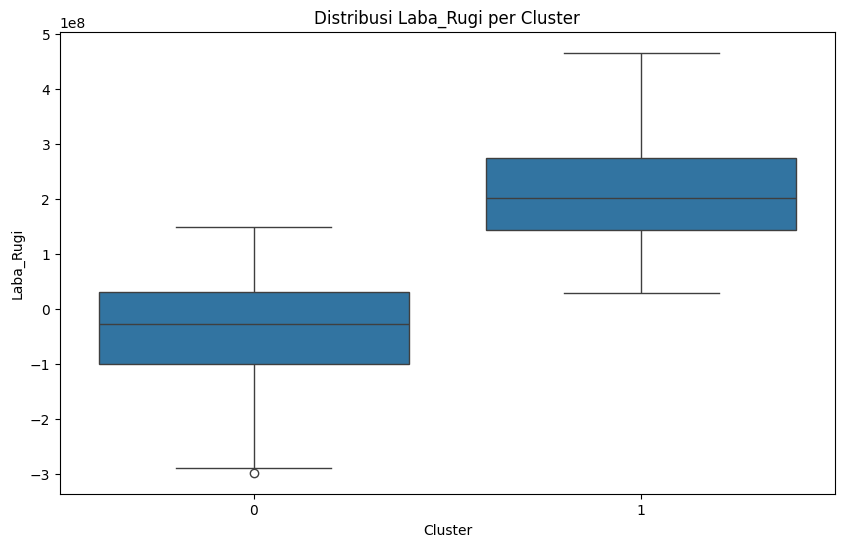

In [32]:
# prompt: menurutmu selanjut nya apa?

# 5. Lakukan K-Means Clustering dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_processed)

# 6. Analisis hasil clustering
# Hitung statistik deskriptif untuk setiap cluster
cluster_stats = df.groupby('Cluster').agg({
    'Pendapatan': ['mean', 'median', 'std'],
    'Beban_Operasional': ['mean', 'median', 'std'],
    'Pajak': ['mean', 'median', 'std'],
    'Laba_Rugi': ['mean', 'median', 'std'],
    'Bidang_Usaha': lambda x: x.mode()[0]  # ambil modus untuk kolom kategori
})

# Tampilkan hasil statistik
cluster_stats

# Visualisasi hasil clustering (opsional)
# Contoh visualisasi dengan scatter plot untuk dua fitur terpilih
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pendapatan', y='Laba_Rugi', hue='Cluster', palette='viridis')
plt.title('Hasil Clustering')
plt.xlabel('Pendapatan')
plt.ylabel('Laba_Rugi')
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi lain
for col in ['Pendapatan', 'Beban_Operasional', 'Pajak', 'Laba_Rugi']:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Cluster', y=col, data=df)
  plt.title(f'Distribusi {col} per Cluster')
  plt.show()



Davies-Bouldin Index: 0.7896747799415719


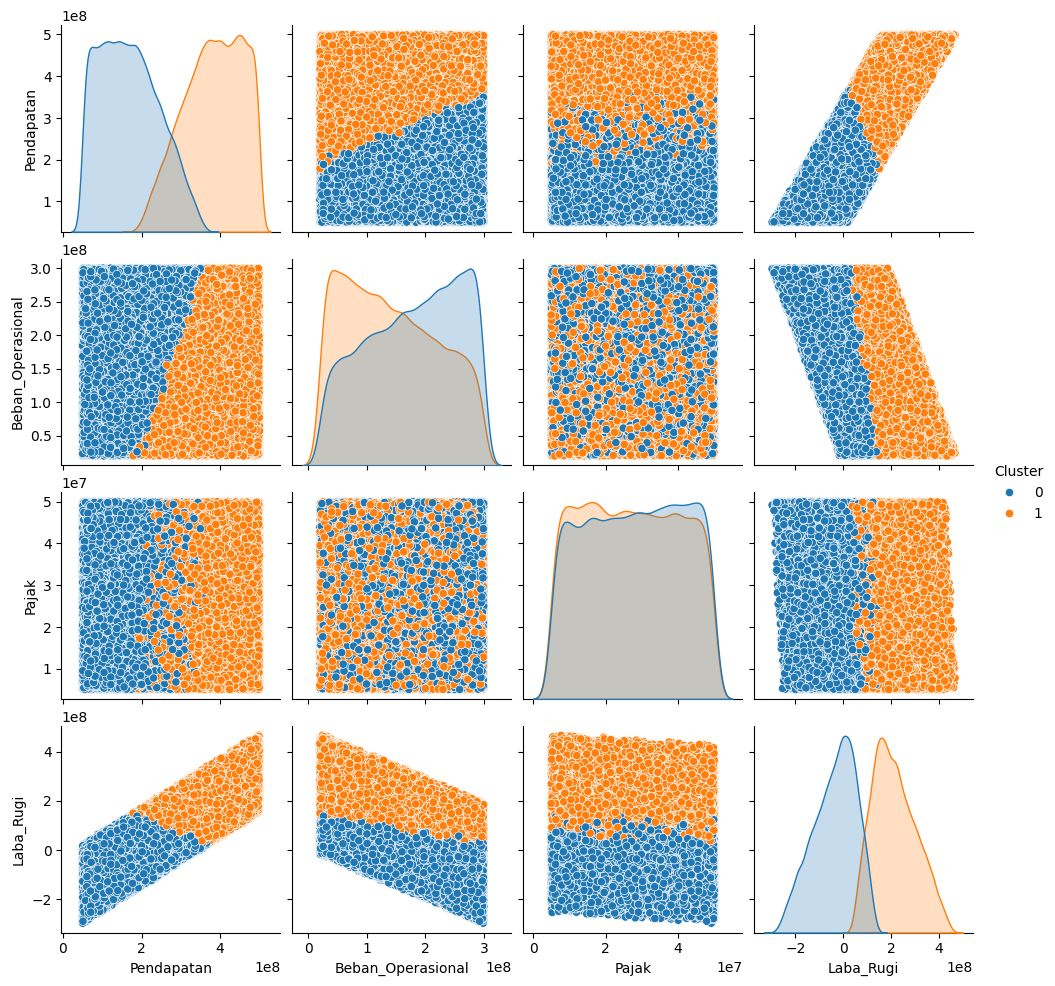

In [33]:
# Evaluasi dengan Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(X_processed, df['Cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Contoh visualisasi pairplot
sns.pairplot(df, hue='Cluster', vars=['Pendapatan', 'Beban_Operasional', 'Pajak', 'Laba_Rugi'])
plt.show()


In [34]:
# Simpan hasil analisis ke dalam file CSV
output_path = 'data/analisis_dataset.csv'